In [1]:
import numpy as np

import pandas as pd
from pandas.io.json import json_normalize

import json

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as py
%matplotlib inline

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

#!pip install beautifulsoup4
from bs4 import BeautifulSoup

import urllib

import requests

import json

from sklearn.preprocessing import StandardScaler

# Scraping Wikipedia Page

In [2]:
quote_page = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = urllib.request.urlopen(quote_page)
soup = BeautifulSoup(page, 'html.parser')

In [3]:
addresses = pd.DataFrame(columns = ['postcode','borough','neighborhood'])

toronto = ['Downtown Toronto', 'West Toronto', 'East Toronto']


flip = False
current = soup.body.table.tbody.tr
for i in range(1,len(soup.body.table.tbody)):
    current = current.next_sibling
    if(flip):
        line = current.td
        postcode = line.text
        line = line.next_sibling.next_sibling
        borough = line.text
        if(borough != 'Not assigned'):  
            line = line.next_sibling.next_sibling
            neighborhood = line.text[:-1]
            if(neighborhood == 'Not assigned'):
                neighborhood = borough
            address = {'postcode':postcode, 'borough':borough, 'neighborhood':neighborhood}
            if(postcode in set(addresses['postcode'])):
                addresses.loc[(addresses['postcode'] == postcode),'neighborhood'] += ', ' + neighborhood
            else:
                addresses = addresses.append(address, ignore_index = True)
        flip = False
    else:
        flip = True

In [4]:
addresses = addresses.sort_values('postcode', axis = 0).reset_index()

In [10]:
set(addresses['borough'])
toronto = ['Central Toronto', 'Downtown Toronto', 'East Toronto', 'West Toronto']
addresses_tornoto = addresses.loc[(addresses['borough'].isin(toronto)),:]

# Adding Coordinate Data to DataFrame

In [11]:
coords = pd.read_csv('https://cocl.us/Geospatial_data')
coords.sort_values('Postal Code', axis = 0).head()
addresses_test = pd.concat([addresses, coords], axis = 1).drop(['Postal Code','index'], axis = 1)
addresses_test.head()

,postcode,borough,neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [18]:
#Extracting addresses in Toronto
toronto = {'Central Toronto', 'Downtown Toronto', 'East Toronto', 'West Toronto'}
addresses_toronto = addresses_test.loc[addresses_test['borough'].isin(toronto),:].reset_index().drop('index', axis = 1)
addresses_toronto

,postcode,borough,neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


# Getting Foursquare Data on Venues

In [12]:
CLIENT_ID = 'Q4RKQ5QDH2EJLHQB0X1HH5YGWP02VKIM3Y0GFIPLWTXQ1VIA'
CLIENT_SECRET = 'P4ORBZGRWND3H0FE4Z4URXSMOBTFCXQ1ICGE5HK02U4PEZ0J'
VERSION = '20190417'

def make_exploration_url(lat, long, radius, limit):

    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, long, radius, limit)

    return url

In [13]:
def get_nearby_venues_max(postalCodes, boroughs, latitudes, longitudes, RADIUS = 500, LIMIT = 1000):
    
    
    venues_df= pd.DataFrame(columns = ['Area_PostalCode',
                                       'Borough',
                                       'Neighborhood_Latitude',
                                       'Neighborhood_Longitude',
                                       'Venue_Name',
                                       'Venue_Category',
                                       'Venue_PostalCode',
                                       'Venue_Latitude',
                                       'Venue_Longitude'])
    
    for postalCode, borough, latitude, longitude in zip(postalCodes, boroughs, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, RADIUS, LIMIT)
        
        
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venueList = []
        
        for v in results:
            try:
                venue = {
                    'Area_PostalCode':postalCode,
                    'Borough':borough,
                    'Neighborhood_Latitude':latitude,
                    'Neighborhood_Longitude':longitude,
                    'Venue_Name':v['venue']['name'],
                    'Venue_Category':v['venue']['categories'][0]['name'],
                    'Venue_PostalCode':v['venue']['location']['postalCode'],
                    'Venue_Latitude':v['venue']['location']['lat'],
                    'Venue_Longitude':v['venue']['location']['lng']
                }
            exceptfi:
                venue = {
                    'Area_PostalCode':postalCode,
                    'Borough':borough,
                    'Neighborhood_Latitude':latitude,
                    'Neighborhood_Longitude':longitude,
                    'Venue_Name':v['venue']['name'],
                    'Venue_Category':v['venue']['categories'][0]['name'],
                    'Venue_PostalCode':'Unknown',
                    'Venue_Latitude':v['venue']['location']['lat'],
                    'Venue_Longitude':v['venue']['location']['lng']
                }
            venueList.append(venue) 
            
        venues_df = venues_df.append(venueList).reset_index(drop = True)
        
            
    return venues_df
        

    

In [20]:
v_df = get_nearby_venues_max(postalCodes = addresses_toronto['postcode'],
                             boroughs = addresses_toronto['borough'],
                             latitudes = addresses_toronto['Latitude'],
                             longitudes = addresses_toronto['Longitude'])

In [21]:
v_df.head()

,Area_PostalCode,Borough,Neighborhood_Latitude,Neighborhood_Longitude,Venue_Name,Venue_Category,Venue_PostalCode,Venue_Latitude,Venue_Longitude
0,M4E,East Toronto,43.676357,-79.293031,The Big Carrot Natural Food Market,Health Food Store,M4E 0B8,43.678879,-79.297734
1,M4E,East Toronto,43.676357,-79.293031,Grover Pub and Grub,Pub,M4E 1R4,43.679181,-79.297215
2,M4E,East Toronto,43.676357,-79.293031,Starbucks,Coffee Shop,M4E 1R3,43.678798,-79.298045
3,M4E,East Toronto,43.676357,-79.293031,Upper Beaches,Neighborhood,Unknown,43.680563,-79.292869
4,M4E,East Toronto,43.676357,-79.293031,Dip 'n Sip,Coffee Shop,Unknown,43.678897,-79.297745


In [27]:
categories = list(set(v_df['Venue_Category']))
Rlist = []
for venue in categories:
    ind = venue.find('Restaurant')
    if(ind != -1):
        Rlist.append(venue)
Rlist



['Mexican Restaurant',
 'Tapas Restaurant',
 'Italian Restaurant',
 'Restaurant',
 'Belgian Restaurant',
 'Portuguese Restaurant',
 'Ethiopian Restaurant',
 'Dim Sum Restaurant',
 'Sushi Restaurant',
 'Chinese Restaurant',
 'Argentinian Restaurant',
 'Falafel Restaurant',
 'Middle Eastern Restaurant',
 'New American Restaurant',
 'Asian Restaurant',
 'Indian Restaurant',
 'Doner Restaurant',
 'Mediterranean Restaurant',
 'Brazilian Restaurant',
 'Theme Restaurant',
 'Cajun / Creole Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Afghan Restaurant',
 'Malay Restaurant',
 'Eastern European Restaurant',
 'German Restaurant',
 'Vietnamese Restaurant',
 'Seafood Restaurant',
 'Ramen Restaurant',
 'Filipino Restaurant',
 'Greek Restaurant',
 'Modern European Restaurant',
 'Korean Restaurant',
 'Japanese Restaurant',
 'Southern / Soul Food Restaurant',
 'American Restaurant',
 'Fast Food Restaurant',
 'Caribbean Restaurant',
 'Thai Restaurant',
 'Molecular Gastronomy Restaurant',
 'Gluten-fr

# Count Venues in Each Postal Code, Store in Data Frame

In [171]:
vCategories = list(set(v_df['Venue_Category']))
pCodes = list(set(v_df['Area_PostalCode']))

vCategories_df = pd.DataFrame(columns = (['Postal_Code'] + vCategories))
v_categories = []

for code  in pCodes:
    venueCount_dict = {'Postal_Code':code}
    for category in vCategories:
        vCount = sum(v_df.loc[(v_df['Area_PostalCode'] == code),:]['Venue_Category'] == category)
        venueCount_dict.update({category : vCount})
    v_categories.append(venueCount_dict)
        
vCategories_df = vCategories_df.append(v_categories, ignore_index = True)
vCategories_df = vCategories_df.set_index('Postal_Code', drop = True)
vCategories_df = vCategories_df.sort_values('Postal_Code')

vCategories_df.head()

,Accessories Store,Brewery,Vegetarian / Vegan Restaurant,Food Truck,Wine Bar,Bank,Korean Restaurant,Cupcake Shop,Colombian Restaurant,Sake Bar,...,Middle Eastern Restaurant,Butcher,Dim Sum Restaurant,Belgian Restaurant,Video Game Store,Sporting Goods Shop,Moving Target,Scenic Lookout,Comic Shop,Salon / Barbershop
Postal_Code,,,,,,,,,,,,,,,,,,,,,
M4E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M4K,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M4L,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M4M,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
M4N,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
#Add Latitude and Longitude to Venues Dataframe
grab = addresses_toronto.sort_values('postcode')[['postcode','Latitude','Longitude']]
grab = grab.set_index('postcode')
vCategories_df = pd.concat([vCategories_df, grab], axis = 1)
vCategories_df.index.name = 'Postal Code'
vCategories_df.head()

,Accessories Store,Brewery,Vegetarian / Vegan Restaurant,Food Truck,Wine Bar,Bank,Korean Restaurant,Cupcake Shop,Colombian Restaurant,Sake Bar,...,Dim Sum Restaurant,Belgian Restaurant,Video Game Store,Sporting Goods Shop,Moving Target,Scenic Lookout,Comic Shop,Salon / Barbershop,Latitude,Longitude
Postal Code,,,,,,,,,,,,,,,,,,,,,
M4E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,43.676357,-79.293031
M4K,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,43.679557,-79.352188
M4L,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,43.668999,-79.315572
M4M,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,43.659526,-79.340923
M4N,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,43.728020,-79.388790


In [179]:
vCategories_df.iloc[0:5,0:241]

,Accessories Store,Brewery,Vegetarian / Vegan Restaurant,Food Truck,Wine Bar,Bank,Korean Restaurant,Cupcake Shop,Colombian Restaurant,Sake Bar,...,Middle Eastern Restaurant,Butcher,Dim Sum Restaurant,Belgian Restaurant,Video Game Store,Sporting Goods Shop,Moving Target,Scenic Lookout,Comic Shop,Salon / Barbershop
Postal Code,,,,,,,,,,,,,,,,,,,,,
M4E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M4K,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M4L,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M4M,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
M4N,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# KMeans Clusters with all Categories of Venue

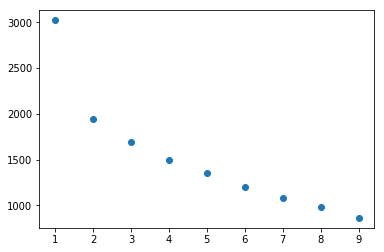

In [180]:
X = vCategories_df.iloc[:,0:241].values

kL = []
iL = []

for k in range(1,10):
    myKmeans = KMeans(n_clusters = k, n_init = 20)
    myKmeans.fit(X)
    kL.append(k)
    iL.append(myKmeans.inertia_)
    
py.scatter(kL, iL)

We see a clear angular 'elbow' at k=2, and so choose this as the number of clusters

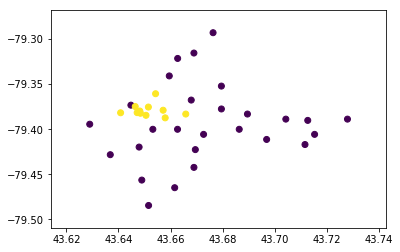

In [181]:
myKmeans = KMeans(n_clusters = 2, n_init = 20)
myKmeans.fit(Xb)

py.scatter(vTopVenues['Latitude'],vTopVenues['Longitude'], c = myKmeans.labels_)

In [185]:
ClusterResults = pd.DataFrame(columns = [
                                            'Cluster One Top Venues (Category, Mean Count)',
                                            'Cluster Two Top Venues (Category, Mean Count)',
                                           ])
alpha = vCategories_df.iloc[:,0:241].loc[(myKmeans.labels_==0),:].mean().sort_values(ascending = False)[0:10]
beta = vCategories_df.iloc[:,0:241].loc[(myKmeans.labels_ == 1),:].mean().sort_values(ascending = False)[0:10]


dList = []
for i in range(len(alpha)):
    row = {'Cluster One Top Venues (Category, Mean Count)':(alpha.index[i], round(alpha.values[i], 2)),
           'Cluster Two Top Venues (Category, Mean Count)':(beta.index[i], round(beta.values[i], 2)),
          }
    dList.append(row)
ClusterResults = ClusterResults.append(dList, ignore_index = True)
ClusterResults

,"Cluster One Top Venues (Category, Mean Count)","Cluster Two Top Venues (Category, Mean Count)"
0,"(Coffee Shop, 1.52)","(Coffee Shop, 9.82)"
1,"(Café, 1.48)","(Café, 4.64)"
2,"(Bar, 0.89)","(Hotel, 3.55)"
3,"(Park, 0.78)","(Restaurant, 3.27)"
4,"(Italian Restaurant, 0.7)","(Italian Restaurant, 2.36)"
5,"(Bakery, 0.67)","(Bakery, 2.09)"
6,"(Pizza Place, 0.67)","(American Restaurant, 1.91)"
7,"(Restaurant, 0.59)","(Japanese Restaurant, 1.82)"
8,"(Sandwich Place, 0.56)","(Gastropub, 1.73)"
9,"(Pub, 0.48)","(Seafood Restaurant, 1.64)"


In [196]:
myKmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In both clusters, coffee shops and Cafes are the most common venues, but neighborhoods in cluster two has more of both overall. 
In cluster one neighborhoods the third and fourth most common venues are bar and park, while in cluster two neighborhoods
these would be hotel and restaurant. Cluster two may represent downtown, with more businesses overall.

In [201]:
center_latitude = v_df['Venue_Latitude'].mean()
center_longitude = v_df['Venue_Longitude'].mean()

myMap = folium.Map(location = [center_latitude, center_longitude], zoom_start = 10)

for lat, long, borough, postcode, cluster_label in zip(addresses_toronto['Latitude'], addresses_toronto['Longitude'],\
                                                     addresses_toronto['borough'], addresses_toronto['postcode'],\
                                                      myKmeans.labels_):
    label = '{}, {}: cluster {}'.format(postcode, borough, cluster_label)
    label = folium.Popup(label, parse_html = True)
    if(cluster_label == 0):
        folium.CircleMarker(
            [lat, long],
            radius = 5,
            popup = label,
            color = 'yellow',
            fill = True,
            fill_color = '#c4b72f',
            fill_opacity = 0.7,
            parse_html = False).add_to(myMap)
    elif(cluster_label == 1):
        folium.CircleMarker(
            [lat, long],
            radius = 5,
            popup = label,
            color = 'purple',
            fill = True,
            fill_color = '#792fc4',
            fill_opacity = 0.7,
            parse_html = False).add_to(myMap)
    
myMap

It appears that my prediction above was largely correct; cluster 1 (as opposed to cluster 0) corresponds fairly closely with the center of downtown Toronto